## Libraries to Install

In [109]:
# !pip install yfinance
# !pip install pmdarima
# !pip install statsmodels

## Import Libraries

In [55]:
import numpy as np
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc("figure", figsize=(20,5))
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

from datetime import datetime

# To import the dataset
import yfinance as yf

# To suppress all warnings
import warnings
warnings.filterwarnings("ignore")

## Import Dataset

In [4]:
stock_name = 'AMZN' # Amazon dataset from Yahoo-Finance

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day) 

stock = yf.download(stock_name, start, end) # Data of past 1 Year

[*********************100%%**********************]  1 of 1 completed


In [5]:
stock.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-07-17,134.559998,135.619995,133.210007,133.559998,133.559998,48450200
2023-07-18,132.710007,133.860001,131.350006,132.830002,132.830002,54969100
2023-07-19,133.389999,135.990005,132.529999,135.360001,135.360001,54531000
2023-07-20,134.070007,134.789993,129.330002,129.960007,129.960007,59820600
2023-07-21,131.339996,131.369995,128.419998,130.000000,130.000000,133265000


# LSTM Model For Stock Prediction

## Scale the data

In [84]:
from sklearn.preprocessing import MinMaxScaler

X = stock['Adj Close'].values

sc = MinMaxScaler(feature_range=(0,1))
scaled_data = sc.fit_transform(X.reshape(-1, 1))

# scaled_data

## Split data into train and test sets

In [85]:
# Create the training data set

train_data = scaled_data[:n, :]

# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

In [86]:
# train_df = pd.DataFrame({'x_train' : x_train, 'y_train' : y_train})
# train_df.head()

In [87]:
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)

In [88]:
# Create the testing data set

test_data = scaled_data[n - 60: , :]

# Create the data sets x_test and y_test
x_test = []
y_test = X.reshape(-1,1)[n:]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

In [89]:
len(y_test)

51

## Model Building

In [90]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

141/141 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0300


In [91]:
# Get the models predicted price values 
y_pred = model.predict(x_test)
y_pred = sc.inverse_transform(y_pred)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 303ms/step


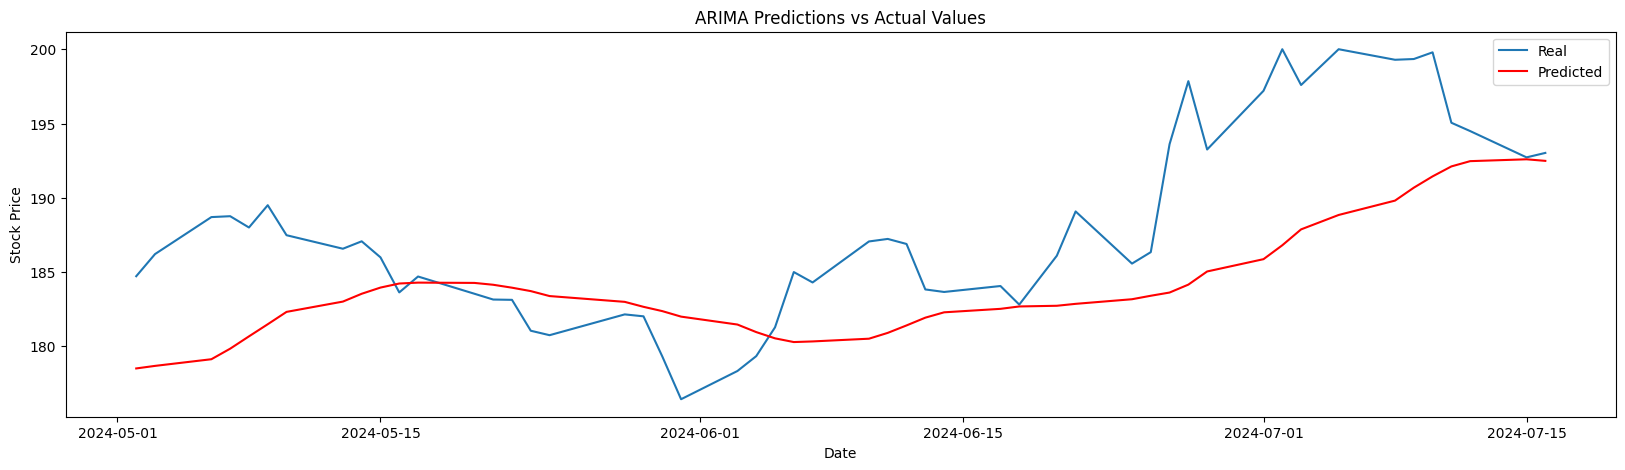

In [107]:
df_adj_Close = stock[['Adj Close']]

plt.plot(df_adj_Close.iloc[n:,:].index, y_test, label='Real')
plt.plot(df_adj_Close.iloc[n:,:].index, y_pred, color='red', label='Predicted')
plt.title('ARIMA Predictions vs Actual Values')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [108]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(y_test, y_pred)
print('MSE: '+str(mse))
mae = mean_absolute_error(y_test, y_pred)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(y_pred - y_test)/np.abs(y_test))
print('MAPE: '+str(mape))

MSE: 36.43434791972258
MAE: 4.7566495409198835
RMSE: 6.036087136525
MAPE: 0.024916075487104363
